**Setup and Hardware Context**

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Personal Note: Loading the 2025 Data Science salary dataset.
# Since I am currently in Toronto exploring the tech scene with my 2014 MacBook (Big Sur),
# I am using Google Colab to leverage cloud processing and avoid hardware limitations.
df = pd.read_csv('salaries.csv')

# Quick look at the data structure
print(f"Dataset successfully loaded: {df.shape[0]} rows and {df.shape[1]} columns.")
df.head()

Dataset successfully loaded: 151445 rows and 11 columns.


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025,EX,FT,Head of Data,348516,USD,348516,US,0,US,M
1,2025,EX,FT,Head of Data,232344,USD,232344,US,0,US,M
2,2025,SE,FT,Data Scientist,145400,USD,145400,US,0,US,M
3,2025,SE,FT,Data Scientist,81600,USD,81600,US,0,US,M
4,2025,MI,FT,Engineer,160000,USD,160000,US,100,US,M


**Average Salary by Experience Level**

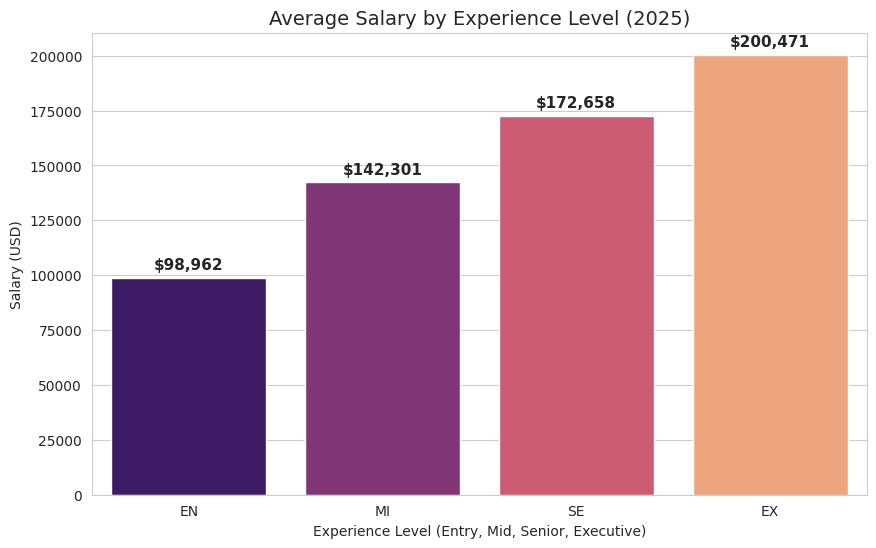

In [20]:
# Analyzing the Career Ladder:
# As I walk through Toronto's Financial District, I wonder:
# How much does experience actually impact compensation in this field?

# Grouping by experience level and ensuring the correct order
order_exp = ['EN', 'MI', 'SE', 'EX']
salary_exp = df.groupby('experience_level')['salary_in_usd'].mean().reindex(order_exp)

plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x=salary_exp.index,
    y=salary_exp.values,
    palette='magma',
    hue=salary_exp.index,
    legend=False
)

# Adding data labels for a professional executive look
for p in ax.patches:
    ax.annotate(f'${p.get_height():,.0f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 9),
                textcoords='offset points', fontsize=11, fontweight='bold')

plt.title('Average Salary by Experience Level (2025)', fontsize=14)
plt.ylabel('Salary (USD)')
plt.xlabel('Experience Level (Entry, Mid, Senior, Executive)')
plt.show()

**Remote Work vs. On-site Salaries**

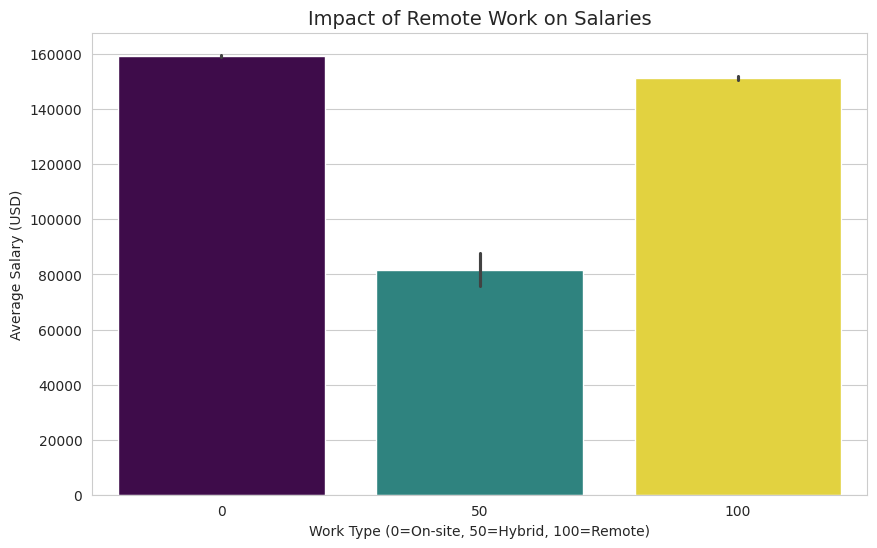

In [21]:
# The "Cafe Culture" Observation:
# Toronto has a vibrant remote work culture. I wanted to see if working from a cafe
# or a home office in the GTA impacts the average paycheck compared to being in the office.

plt.figure(figsize=(10, 6))
sns.barplot(
    data=df,
    x='remote_ratio',
    y='salary_in_usd',
    palette='viridis',
    hue='remote_ratio',
    legend=False
)

plt.title('Impact of Remote Work on Salaries', fontsize=14)
plt.xlabel('Work Type (0=On-site, 50=Hybrid, 100=Remote)')
plt.ylabel('Average Salary (USD)')
plt.show()

**Local Focus - Canada vs. Global Leaders**

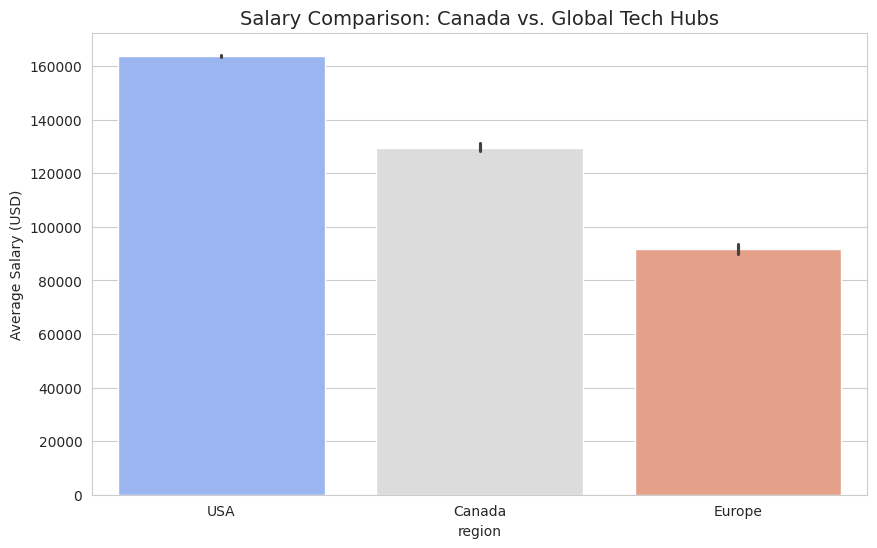

In [22]:
# Regional Comparison:
# How does Canada (my current base) stand against the USA and Europe?
target_countries = ['CA', 'US', 'GB', 'DE', 'FR', 'ES']
df_filtered = df[df['company_location'].isin(target_countries)].copy()

df_filtered['region'] = df_filtered['company_location'].apply(
    lambda x: 'USA' if x == 'US' else ('Canada' if x == 'CA' else 'Europe')
)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=df_filtered,
    x='region',
    y='salary_in_usd',
    palette='coolwarm',
    order=['USA', 'Canada', 'Europe'],
    hue='region',
    legend=False
)

plt.title('Salary Comparison: Canada vs. Global Tech Hubs', fontsize=14)
plt.ylabel('Average Salary (USD)')
plt.show()

**The Canadian Career Ladder**

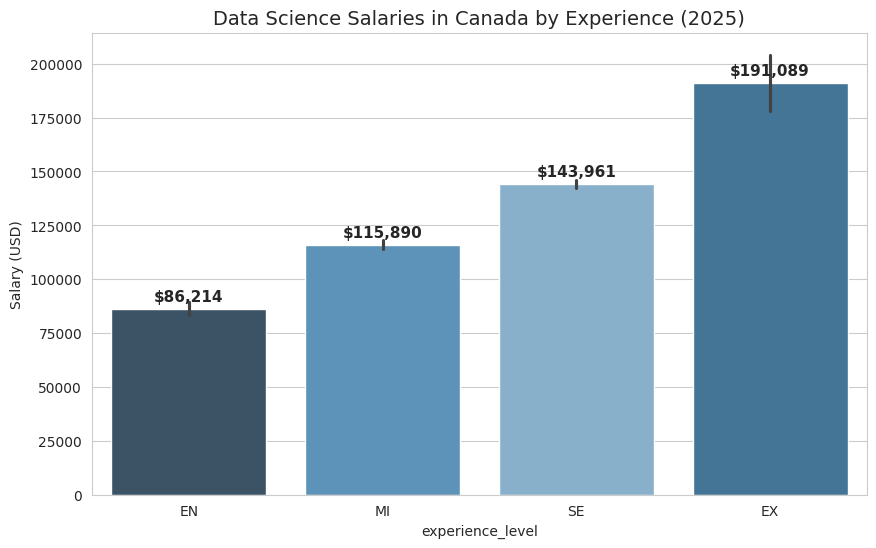

In [25]:
# Deep Dive: Experience Levels in Canada
# Global averages are one thing, but what does the ladder look like here in Canada?
# This helps me set realistic expectations for my own journey in Toronto.

df_canada = df[df['company_location'] == 'CA']
order_exp = ['EN', 'MI', 'SE', 'EX']

plt.figure(figsize=(10, 6))
ax_ca = sns.barplot(
    data=df_canada,
    x='experience_level',
    y='salary_in_usd',
    order=order_exp,
    palette='Blues_d',
    hue='experience_level',
    legend=False
)

# Adding labels to see the exact figures for the Canadian market
for p in ax_ca.patches:
    ax_ca.annotate(f'${p.get_height():,.0f}',
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center', xytext=(0, 9),
                   textcoords='offset points', fontsize=11, fontweight='bold')

plt.title('Data Science Salaries in Canada by Experience (2025)', fontsize=14)
plt.ylabel('Salary (USD)')
plt.show()

**Entry-Level Salary Evolution**

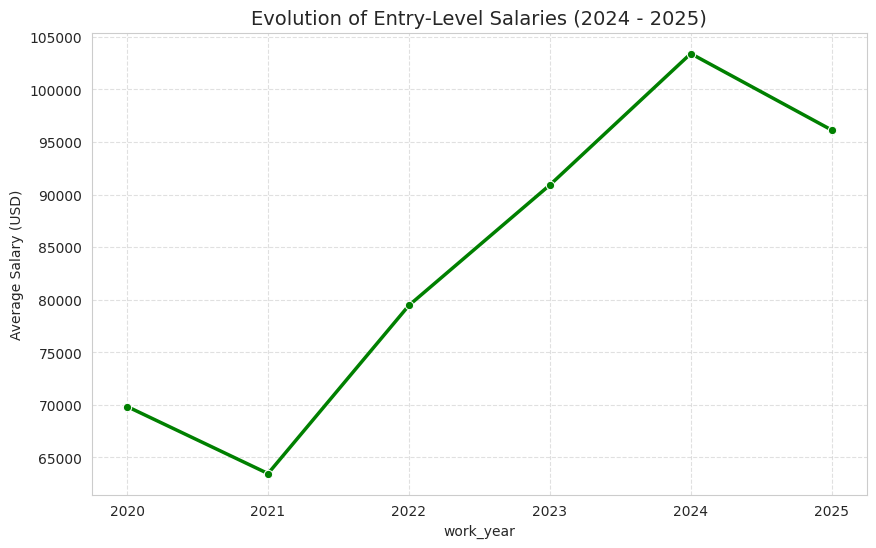

In [26]:
# Market Trajectory: Is now a good time to start?
# I wanted to see how the "Entry-Level" (EN) salaries have evolved.
# Understanding the trend from 2024 to 2025 gives me confidence in the market's health.

df_junior = df[df['experience_level'] == 'EN']

plt.figure(figsize=(10, 6))
sns.lineplot(
    data=df_junior,
    x='work_year',
    y='salary_in_usd',
    marker='o',
    color='green',
    linewidth=2.5,
    errorbar=None # Focusing on the average trend
)

plt.title('Evolution of Entry-Level Salaries (2024 - 2025)', fontsize=14)
plt.xticks(df['work_year'].unique())
plt.ylabel('Average Salary (USD)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

**Final Insights & Hardware Resilience**

In [24]:
# FINAL TAKEAWAY:
# This analysis shows that Canada is a very strong contender in the tech space.
# For a junior (EN) like me, the remote options and the growth potential in
# hubs like Toronto are exciting.

# Dealing with a 2014 Mac while traveling through Toronto was a challenge,
# but it proved that with the right cloud tools (Google Colab) and curiosity,
# data can be analyzed from anywhere.